In [2]:
# example 1.4 from kutz dmd book
import numpy as np

# define space and time discretizations
xi = np.linspace(-10,10,400)
t = np.linspace(0,4*np.pi,200)
Xgrid,Tgrid = np.meshgrid(xi,t)

# create two spatiotemporal patterns and combine
f1 = 1/np.cosh(Xgrid+3) * np.exp(2.3j*Tgrid)
f2 = 1/np.cosh(Xgrid) * np.tanh(Xgrid) * 2*np.exp(2.8j*Tgrid)
f = f1 + f2

# data matrix n_space x n_time
X = f.T

Computing DMD on X, shape 400 by 200.
TLSQ debiasing: UNUSED
SVD performed with manual truncation, rank 10.
X_dmd MSE 1.1847551941893854e-27


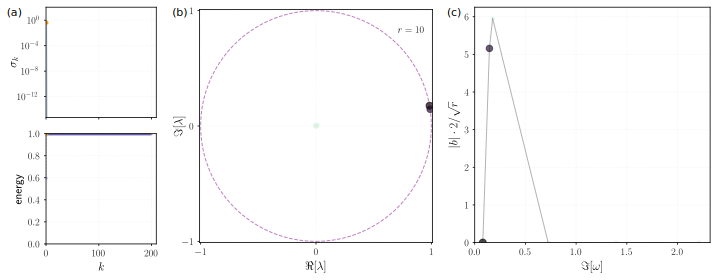

In [2]:
import dmdz

dmd = dmdz.DMD(X)
dmd.svd_rank = 10
dmd.fit()
Xdmd = dmd.reconstruction[0]

dmd.plot_analysis(mode='discrete')

NameError: name 'Xdmd' is not defined

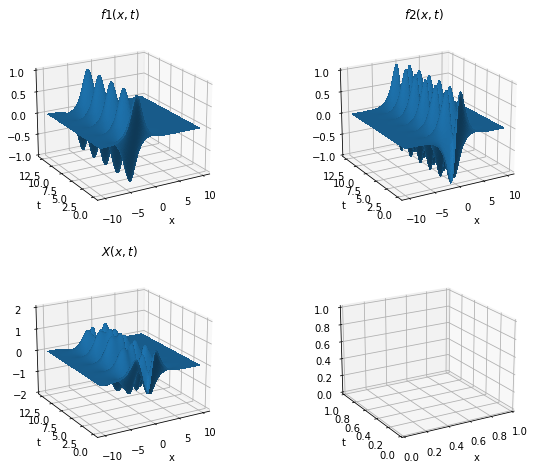

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))

ax = []
for j in range(4):
    axis = fig.add_subplot(2, 2, j+1, projection='3d')
    axis.set(xlabel='x',ylabel='t')
    axis.view_init(20,-120)
    ax.append(axis)
    
stride = 1

ax[0].plot_surface(Xgrid, Tgrid, np.real(f1), rstride=stride, cstride=stride, linewidth=0, antialiased=False, shade=True)
ax[0].set_title('$f1(x,t)$')
ax[0].set_zlim(-1, 1)
ax[1].plot_surface(Xgrid, Tgrid, np.real(f2), rstride=stride, cstride=stride, linewidth=0, antialiased=False, shade=True)
ax[1].set_title('$f2(x,t)$')
ax[1].set_zlim(-1, 1)
ax[2].plot_surface(Xgrid, Tgrid, np.real(X.T), rstride=stride, cstride=stride, linewidth=0, antialiased=False, shade=True)
ax[2].set_title('$X(x,t)$')
ax[2].set_zlim(-2, 2)
ax[3].plot_surface(Xgrid, Tgrid, np.real(Xdmd.T), rstride=stride, cstride=stride, linewidth=0, antialiased=False, shade=True)
ax[3].set_title('$X_{DMD}(x,t)$')
ax[3].set_zlim(-2, 2)
fig.tight_layout()